In [1]:
from dtw import dtw
import math
import numpy as np
from random import *
from scipy.spatial.distance import euclidean
from scipy import stats
from fastdtw import fastdtw
from sklearn.preprocessing import MinMaxScaler
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def convert_arry(temp):
    arr = np.array([float(x) for x in temp])
    return arr

In [3]:
def createZeroArray(size):
    return np.array([0]*size).reshape(-1, 1)

In [4]:
def computeDistance(array1, array2):
#     array1 = convert_arry(array1).reshape(-1, 1)
#     array2 = convert_arry(array2).reshape(-1, 1)
    array1 = array1.reshape(-1, 1)
    array2 = array2.reshape(-1, 1)
    distanceXY, _ = fastdtw(stats.zscore(array1), stats.zscore(array2),  dist=euclidean)
    size = max(len(array1),len(array2))
    distanceX0, _ = fastdtw(stats.zscore(array1), createZeroArray(size), dist=euclidean)
    distance0Y, _ = fastdtw(createZeroArray(size), stats.zscore(array2), dist=euclidean)
    correlation = 1 - (distanceXY/(distanceX0 + distance0Y))
    return correlation


In [5]:
def plot_graph(df1,df2,column1,column2,label1,label2,title):
    plt.figure(figsize=(12,5))
    plt.title(title)
    ax1 = df1[column1].plot(color='blue', grid=True, label=label1)
    ax2 = df2[column2].plot(color='red', grid=True, secondary_y=True, label=label2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    plt.show()

In [6]:
demo_df = pd.read_csv('NYC_Demo_Final.csv',index_col=0)
demo_df

,Full Time Year Round,Some Work,No Work,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic Asian,Citizen by Birth,Naturalized Citizen,Not a Citizen,Less than High School,High School Degree,Some College,Bachelors Degree or higher,Total NYC Population,Total Crime Count,Per Capita Income,"Household under $10,000 income"
YEAR,,,,,,,,,,,,,,,,,
2011,25.2,48.7,60.8,30.9,48.2,51.4,42.5,43.8,59.3,65.9,52.3,40.0,20.4,42.1,504334,30200,11.1
2012,25.1,47.4,59.5,28.1,47.6,52.7,41.5,43.6,60.0,67.0,51.1,38.5,19.2,41.1,498381,30730,11.1
2013,26.1,48.6,60.3,30.1,49.1,49.3,42.4,45.0,59.8,66.7,52.7,40.8,20.2,42.1,495304,32540,10.7
2014,24.5,50.2,59.5,28.8,47.9,50.7,41.8,44.2,58.2,66.9,52.3,40.1,19.6,41.2,491131,32910,10.9
2015,24.3,48.0,59.0,28.6,47.1,48.6,40.7,43.2,58.1,67.0,50.8,39.5,19.0,40.4,477031,34396,10.1
2016,24.0,47.6,58.4,27.8,45.5,49.9,39.8,43.5,56.8,66.2,50.7,39.3,18.7,39.8,468290,35508,10.0


In [7]:
# Correlation of crime with Per Capita Income
corr = computeDistance(demo_df['Total Crime Count'].values,demo_df['Per Capita Income'].values)
print("Correaltion between Crime and Per CAPITA Income from 2011-2016 is:", corr)

Correaltion between Crime and Per CAPITA Income from 2011-2016 is: 0.020466750345849438


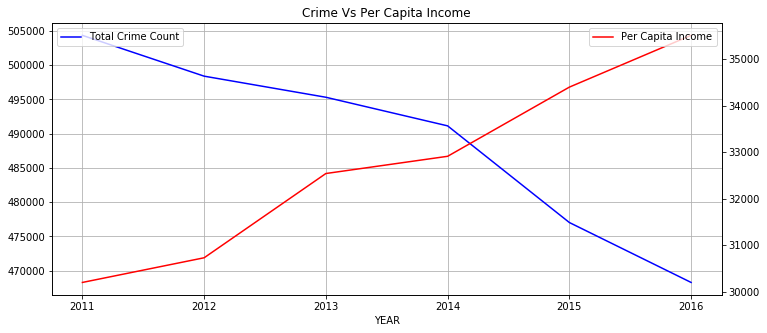

In [8]:
title = "Crime Vs Per Capita Income"
plot_graph(demo_df,demo_df,'Total Crime Count','Per Capita Income', 'Total Crime Count','Per Capita Income',title)

In [9]:
# Correlation of crime with No Work Percentage
corr = computeDistance(demo_df['Total Crime Count'].values,demo_df['No Work'].values)
print("Correaltion between Crime and No work Percentage Income from 2011-2016 is:", corr)

Correaltion between Crime and No work Percentage Income from 2011-2016 is: 0.7794350589050536


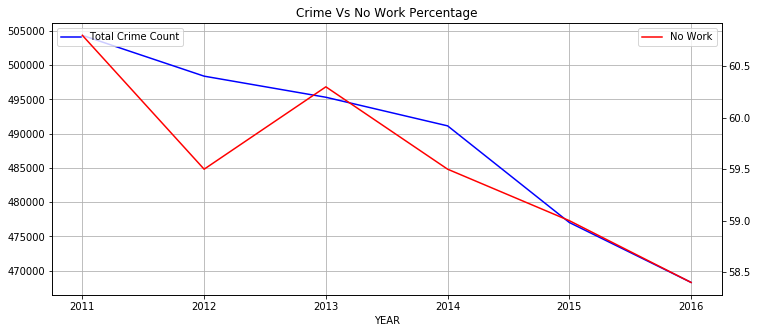

In [10]:
title = "Crime Vs No Work Percentage"
plot_graph(demo_df,demo_df,'Total Crime Count','No Work', 'Total Crime Count','No Work',title)

In [11]:
# Correlation of crime with Not a citizen Percentage
corr = computeDistance(demo_df['Total Crime Count'].values,demo_df['Not a Citizen'].values)
print("Correaltion between Crime and Not a Citizen Percentage from 2011-2016 is:", corr)

Correaltion between Crime and Not a Citizen Percentage from 2011-2016 is: 0.7605255999191833


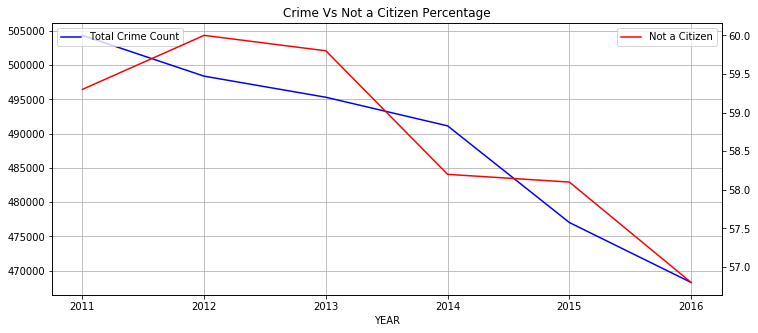

In [12]:
title = "Crime Vs Not a Citizen Percentage"
plot_graph(demo_df,demo_df,'Total Crime Count','Not a Citizen', 'Total Crime Count','Not a Citizen',title)

In [13]:
# Correlation of crime with Full Time Work Percentage
corr = computeDistance(demo_df['Total Crime Count'].values,demo_df['Full Time Year Round'].values)
print("Correaltion between Crime and Full Time Work Percentage from 2011-2016 is:", corr)

Correaltion between Crime and Full Time Work Percentage from 2011-2016 is: 0.6475307670896546


In [14]:
# Correlation of crime with Bachelors Degree or higher
corr = computeDistance(demo_df['Total Crime Count'].values,demo_df['Bachelors Degree or higher'].values)
print("Correaltion between Crime and Bachelors Degree or higher Percentage from 2011-2016 is:", corr)


Correaltion between Crime and Bachelors Degree or higher Percentage from 2011-2016 is: 0.757309648168399


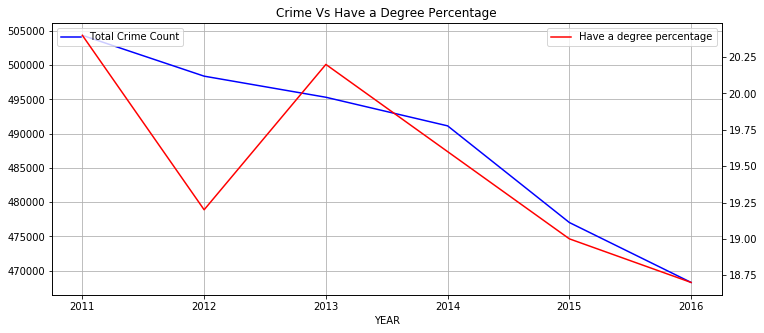

In [15]:
title = "Crime Vs Have a Degree Percentage"
plot_graph(demo_df,demo_df,'Total Crime Count','Bachelors Degree or higher', 'Total Crime Count','Have a degree percentage',title)

In [18]:
# Correlation of crime with Bachelors Degree or higher
corr = computeDistance(demo_df['Total Crime Count'].values,demo_df['Household under $10,000 income'].values)
print("Correaltion between Crime and Household under $10,000 income percentage from 2011-2016 is:", corr)


Correaltion between Crime and Household under $10,000 income percentage from 2011-2016 is: 0.8370203384440683


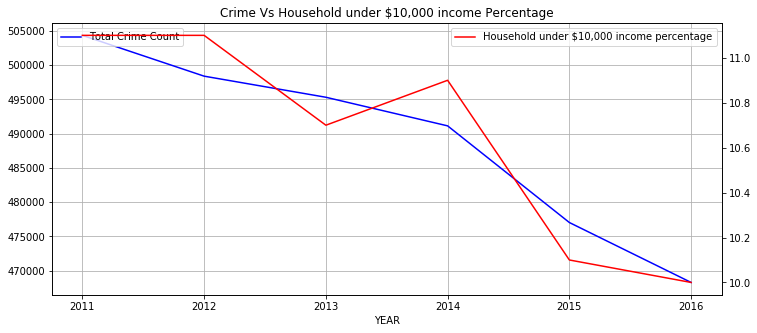

In [19]:
title = "Crime Vs Household under $10,000 income Percentage"
plot_graph(demo_df,demo_df,'Total Crime Count','Household under $10,000 income', 'Total Crime Count','Household under $10,000 income percentage',title)